## ![BTS](img/Logo-BTS.jpg)

# Session 20: Text Classification

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-12-11)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/20-Text-Classification.ipynb)

## Exercise 1: Simple feature selection with names

1. Load the list of male and females names from `data/names` in a single list of `(name, gender)` pairs and shuffle it.
2. Create a function that returns a tuple `({"last_letter": last_letter}, gender)` for each entry in our dataset
3. Use the `DictVectorizer` from `sklearn.feature_extraction` to turn this dictionary into a rectangular, **non sparse** array. How does it work?
4. Split the data into train and test, using 70 % and 30 % respectively.
5. Fit a Naïve Bayes classifier from `sklearn.naive_bayes` with the default hyperparameters to the train data.
6. Use `accuracy_score` from `sklearn.metrics` to evaluate our model. How good it is?
7. Display the `confusion_matrix` (from `sklearn.metrics`) of this model (hint: use `seaborn.heatmap`). What does it mean?
8. Create new features, such as the first letter, whether it has a certain letter or not... And evaluate the model again

In [3]:
!ls data/names/

female.txt  male.txt  README


In [4]:
!head data/names/male.txt

Aamir
Aaron
Abbey
Abbie
Abbot
Abbott
Abby
Abdel
Abdul
Abdulkarim


In [1]:
import pandas as pd

In [2]:
male_names = pd.read_csv("data/names/male.txt", header=None,
                         names=["Name"])
male_names['Gender'] = 'Male'

In [3]:
female_names = pd.read_csv("data/names/female.txt", header=None,
                           names=["Name"])
female_names['Gender'] = 'Female'

In [4]:
names = pd.concat([male_names, female_names])
names.head()

,Name,Gender
0,Aamir,Male
1,Aaron,Male
2,Abbey,Male
3,Abbie,Male
4,Abbot,Male


In [5]:
names['Name'] = names['Name'].str.strip()

In [6]:
# names.loc[names['Name'].isin(...), 'Gender'] = 'Unisex'
names.loc[
    names['Name'].isin(set(male_names['Name']) & set(female_names['Name'])),
    'Gender'
] = 'Unisex'

In [7]:
names = names.drop_duplicates()
names.head()

,Name,Gender
0,Aamir,Male
1,Aaron,Male
2,Abbey,Unisex
3,Abbie,Unisex
4,Abbot,Male


In [8]:
names['Name'].is_unique

True

In [9]:
from sklearn.utils import shuffle

In [10]:
len(names)

7578

In [11]:
#names = shuffle(names)
#names.head()

In [12]:
names["last_letter"] = names['Name'].str[-1]
names.head()

,Name,Gender,last_letter
0,Aamir,Male,r
1,Aaron,Male,n
2,Abbey,Unisex,y
3,Abbie,Unisex,e
4,Abbot,Male,t


In [98]:
names["first_letter"] = names['Name'].str[0]
names.head()

,Name,Gender,last_letter,first_letter
0,Aamir,Male,r,A
1,Aaron,Male,n,A
2,Abbey,Unisex,y,A
3,Abbie,Unisex,e,A
4,Abbot,Male,t,A


In [102]:
names["contains_a"] = names['Name'].str.lower().str.contains('a')
names.head()

,Name,Gender,last_letter,first_letter,contains_a
0,Aamir,Male,r,A,True
1,Aaron,Male,n,A,True
2,Abbey,Unisex,y,A,True
3,Abbie,Unisex,e,A,True
4,Abbot,Male,t,A,True


In [103]:
names = names.reset_index(drop=True)
names.head()

,Name,Gender,last_letter,first_letter,contains_a
0,Aamir,Male,r,A,True
1,Aaron,Male,n,A,True
2,Abbey,Unisex,y,A,True
3,Abbie,Unisex,e,A,True
4,Abbot,Male,t,A,True


In [104]:
names['Name'].is_unique

True

In [105]:
' ' in names['last_letter'].unique()

False

In [107]:
values = list(names[['last_letter', 'first_letter', 'contains_a']].T.to_dict().values())
values

[{'last_letter': 'r', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'n', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'y', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'e', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 't', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 't', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'y', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'l', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'l', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'm', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'h', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'e', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'l', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'd', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'r', 'first_letter': 'A', 'contains_a': True},
 {'last_letter': 'm', 'first_letter': 'A

In [108]:
from sklearn.feature_extraction import DictVectorizer

In [109]:
dv = DictVectorizer(dtype=int, sparse=False)

In [110]:
X = dv.fit_transform(values)
X

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
dv.feature_names_

['contains_a',
 'first_letter=A',
 'first_letter=B',
 'first_letter=C',
 'first_letter=D',
 'first_letter=E',
 'first_letter=F',
 'first_letter=G',
 'first_letter=H',
 'first_letter=I',
 'first_letter=J',
 'first_letter=K',
 'first_letter=L',
 'first_letter=M',
 'first_letter=N',
 'first_letter=O',
 'first_letter=P',
 'first_letter=Q',
 'first_letter=R',
 'first_letter=S',
 'first_letter=T',
 'first_letter=U',
 'first_letter=V',
 'first_letter=W',
 'first_letter=X',
 'first_letter=Y',
 'first_letter=Z',
 'last_letter=a',
 'last_letter=b',
 'last_letter=c',
 'last_letter=d',
 'last_letter=e',
 'last_letter=f',
 'last_letter=g',
 'last_letter=h',
 'last_letter=i',
 'last_letter=j',
 'last_letter=k',
 'last_letter=l',
 'last_letter=m',
 'last_letter=n',
 'last_letter=o',
 'last_letter=p',
 'last_letter=r',
 'last_letter=s',
 'last_letter=t',
 'last_letter=u',
 'last_letter=v',
 'last_letter=w',
 'last_letter=x',
 'last_letter=y',
 'last_letter=z']

In [112]:
X.shape

(7578, 52)

In [113]:
y = names['Gender']
y

0         Male
1         Male
2       Unisex
3       Unisex
4         Male
5         Male
6       Unisex
7         Male
8         Male
9         Male
10        Male
11        Male
12        Male
13        Male
14        Male
15        Male
16        Male
17        Male
18        Male
19        Male
20        Male
21      Unisex
22        Male
23        Male
24        Male
25        Male
26        Male
27        Male
28        Male
29        Male
         ...  
7548    Female
7549    Female
7550    Female
7551    Female
7552    Female
7553    Female
7554    Female
7555    Female
7556    Female
7557    Female
7558    Female
7559    Female
7560    Female
7561    Female
7562    Female
7563    Female
7564    Female
7565    Female
7566    Female
7567    Female
7568    Female
7569    Female
7570    Female
7571    Female
7572    Female
7573    Female
7574    Female
7575    Female
7576    Female
7577    Female
Name: Gender, Length: 7578, dtype: object

In [114]:
y.shape

(7578,)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, shuffle=True,
)

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
m3 = RandomForestClassifier(n_estimators=100)

In [130]:
m3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
y_pred3 = m3.predict(X_test)

In [153]:
y.value_counts() / len(y)

Female    0.611639
Male      0.340195
Unisex    0.048166
Name: Gender, dtype: float64

In [126]:
accuracy_score(y_test, y_pred3)

0.7678100263852242

In [12]:
names["last_letter"] = names['Name'].str[-1]
names.head()

,Name,Gender,last_letter
0,Aamir,Male,r
1,Aaron,Male,n
2,Abbey,Unisex,y
3,Abbie,Unisex,e
4,Abbot,Male,t


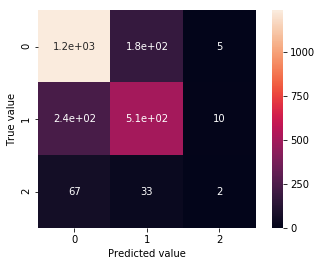

In [125]:
sns.heatmap(
    confusion_matrix(y_test, y_pred3),
    square=True, annot=True,
)
plt.xlabel("Predicted value")
plt.ylabel("True value");

In [147]:
print(dv.feature_names_)

['contains_a', 'first_letter=A', 'first_letter=B', 'first_letter=C', 'first_letter=D', 'first_letter=E', 'first_letter=F', 'first_letter=G', 'first_letter=H', 'first_letter=I', 'first_letter=J', 'first_letter=K', 'first_letter=L', 'first_letter=M', 'first_letter=N', 'first_letter=O', 'first_letter=P', 'first_letter=Q', 'first_letter=R', 'first_letter=S', 'first_letter=T', 'first_letter=U', 'first_letter=V', 'first_letter=W', 'first_letter=X', 'first_letter=Y', 'first_letter=Z', 'last_letter=a', 'last_letter=b', 'last_letter=c', 'last_letter=d', 'last_letter=e', 'last_letter=f', 'last_letter=g', 'last_letter=h', 'last_letter=i', 'last_letter=j', 'last_letter=k', 'last_letter=l', 'last_letter=m', 'last_letter=n', 'last_letter=o', 'last_letter=p', 'last_letter=r', 'last_letter=s', 'last_letter=t', 'last_letter=u', 'last_letter=v', 'last_letter=w', 'last_letter=x', 'last_letter=y', 'last_letter=z']


In [146]:
m3.feature_importances_

array([0.05977234, 0.00698893, 0.01287675, 0.01772361, 0.01012713,
       0.00964728, 0.00726523, 0.01261213, 0.01476213, 0.00683131,
       0.01327226, 0.01530789, 0.01504784, 0.01617004, 0.00781282,
       0.00443132, 0.01171865, 0.00302262, 0.00975445, 0.01063731,
       0.01687744, 0.00405343, 0.00607984, 0.02527348, 0.00041601,
       0.00697211, 0.00653766, 0.22887934, 0.00460565, 0.00719723,
       0.04611704, 0.08165177, 0.00428063, 0.00622968, 0.01192455,
       0.04984524, 0.00046594, 0.0141596 , 0.01613638, 0.01390412,
       0.02121251, 0.03154086, 0.00318036, 0.02793921, 0.03380921,
       0.02322906, 0.0023898 , 0.00353911, 0.00309718, 0.003772  ,
       0.026944  , 0.00195754])

In [150]:
np.array(dv.feature_names_)[m3.feature_importances_.argsort()[:5]]

array(['first_letter=X', 'last_letter=j', 'last_letter=z',
       'last_letter=u', 'first_letter=Q'], dtype='<U14')

In [65]:
from sklearn.naive_bayes import GaussianNB

In [81]:
from sklearn.svm import SVC

In [85]:
m2 = SVC(gamma='scale')

In [86]:
m2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
y_pred2 = m2.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred2)

0.7313104661389622

In [92]:
m2.classes_

array(['Female', 'Male', 'Unisex'], dtype=object)

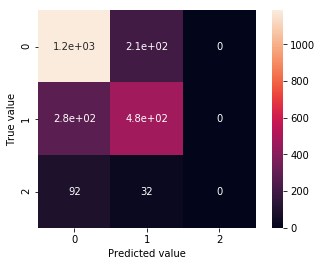

In [91]:
sns.heatmap(
    confusion_matrix(y_test, y_pred2),
    square=True, annot=True,
)
plt.xlabel("Predicted value")
plt.ylabel("True value");

In [94]:
from sklearn.feature_selection import chi2

In [95]:
chi2?

In [66]:
model = GaussianNB()

In [67]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, y_pred)

0.08091468777484609

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt

In [74]:
model.classes_

array(['Female', 'Male', 'Unisex'], dtype='<U6')

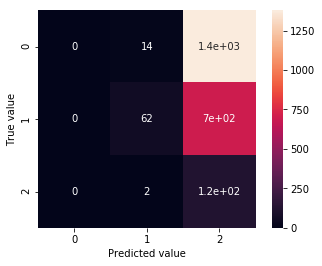

In [75]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    square=True, annot=True,
)
plt.xlabel("Predicted value")
plt.ylabel("True value");

In [38]:
X_train.shape

(5304, 25)

In [39]:
X_test.shape

(2274, 25)

In [40]:
y_train.shape

(5304,)

In [41]:
y_test.shape

(2274,)

## Exercise 2: 20 newsgroups dataset

1. Read the `train` and `test` subsets of the 20 newsgroups dataset in two variables, `newsgroups_train` and `newsgroups_test`, using the function `fetch_20newsgroups` from `sklearn.datasets`.
2. [TBD]

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
fetch_20newsgroups();